In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

In [3]:
data = pd.read_csv('new_data_evaluacion.csv')
data

,Unnamed: 0,edad,fnlwgt,educacionNum,estadoCivil,relacion,ocupacion,raza,genero,gananciaCapital,perdidaCapital,horasSemana,pais,tipoEmpleo,salario
0,0,39,77516,13,1,1,0,4,1,1,0,40,1,0,1
1,1,50,83311,13,0,0,3,4,1,0,0,13,1,2,1
2,2,38,215646,9,1,1,5,4,1,0,0,40,1,1,1
3,3,53,234721,7,0,0,5,2,1,0,0,40,1,1,1
4,4,28,338409,13,0,5,9,2,0,0,0,40,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,48837,39,215419,13,1,1,9,4,0,0,0,36,1,1,1
48838,48838,64,321403,9,1,2,9,2,1,0,0,40,1,1,1
48839,48839,38,374983,13,0,0,9,4,1,0,0,50,1,1,1
48840,48840,44,83891,13,1,3,0,1,1,1,0,40,1,1,1


In [4]:
data.drop("Unnamed: 0",axis=1,inplace=True)
data

,edad,fnlwgt,educacionNum,estadoCivil,relacion,ocupacion,raza,genero,gananciaCapital,perdidaCapital,horasSemana,pais,tipoEmpleo,salario
0,39,77516,13,1,1,0,4,1,1,0,40,1,0,1
1,50,83311,13,0,0,3,4,1,0,0,13,1,2,1
2,38,215646,9,1,1,5,4,1,0,0,40,1,1,1
3,53,234721,7,0,0,5,2,1,0,0,40,1,1,1
4,28,338409,13,0,5,9,2,0,0,0,40,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,215419,13,1,1,9,4,0,0,0,36,1,1,1
48838,64,321403,9,1,2,9,2,1,0,0,40,1,1,1
48839,38,374983,13,0,0,9,4,1,0,0,50,1,1,1
48840,44,83891,13,1,3,0,1,1,1,0,40,1,1,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   edad             48842 non-null  int64
 1   fnlwgt           48842 non-null  int64
 2   educacionNum     48842 non-null  int64
 3   estadoCivil      48842 non-null  int64
 4   relacion         48842 non-null  int64
 5   ocupacion        48842 non-null  int64
 6   raza             48842 non-null  int64
 7   genero           48842 non-null  int64
 8   gananciaCapital  48842 non-null  int64
 9   perdidaCapital   48842 non-null  int64
 10  horasSemana      48842 non-null  int64
 11  pais             48842 non-null  int64
 12  tipoEmpleo       48842 non-null  int64
 13  salario          48842 non-null  int64
dtypes: int64(14)
memory usage: 5.2 MB


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   edad             48842 non-null  int64
 1   fnlwgt           48842 non-null  int64
 2   educacionNum     48842 non-null  int64
 3   estadoCivil      48842 non-null  int64
 4   relacion         48842 non-null  int64
 5   ocupacion        48842 non-null  int64
 6   raza             48842 non-null  int64
 7   genero           48842 non-null  int64
 8   gananciaCapital  48842 non-null  int64
 9   perdidaCapital   48842 non-null  int64
 10  horasSemana      48842 non-null  int64
 11  pais             48842 non-null  int64
 12  tipoEmpleo       48842 non-null  int64
 13  salario          48842 non-null  int64
dtypes: int64(14)
memory usage: 5.2 MB


In [7]:
data.describe()

,edad,fnlwgt,educacionNum,estadoCivil,relacion,ocupacion,raza,genero,gananciaCapital,perdidaCapital,horasSemana,pais,tipoEmpleo,salario
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,0.541051,1.443287,6.152819,3.668052,0.668482,0.082613,0.046722,40.422382,0.914971,0.980959,0.760718
std,13.710510,1.056040e+05,2.570973,0.498317,1.602151,3.968837,0.845986,0.470764,0.275300,0.211045,12.391444,0.278928,0.500042,0.426649
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.000000,40.000000,1.000000,1.000000,1.000000
50%,37.000000,1.781445e+05,10.000000,1.000000,1.000000,7.000000,4.000000,1.000000,0.000000,0.000000,40.000000,1.000000,1.000000,1.000000
75%,48.000000,2.376420e+05,12.000000,1.000000,3.000000,9.000000,4.000000,1.000000,0.000000,0.000000,45.000000,1.000000,1.000000,1.000000
max,90.000000,1.490400e+06,16.000000,1.000000,5.000000,13.000000,4.000000,1.000000,1.000000,1.000000,99.000000,1.000000,3.000000,1.000000


## Entrenamiento del modelo

In [8]:
x = data.drop(columns=['salario']).values
y = data['salario'].values

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=42)

In [10]:
lrm = LogisticRegression()# algoritmo a utilizar
lrm.fit(x_train,y_train)

LogisticRegression()

In [11]:
y_pred = lrm.predict(x_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3544
           1       0.76      1.00      0.86     11109

    accuracy                           0.76     14653
   macro avg       0.38      0.50      0.43     14653
weighted avg       0.57      0.76      0.65     14653



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3544
           1       0.76      1.00      0.86     11109

    accuracy                           0.76     14653
   macro avg       0.38      0.50      0.43     14653
weighted avg       0.57      0.76      0.65     14653



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
confusion_matrix(y_test, y_pred)

array([[    0,  3544],
       [    0, 11109]], dtype=int64)

In [15]:
confusion_matrix(y_test, y_pred)

array([[    0,  3544],
       [    0, 11109]], dtype=int64)

In [16]:
# Evaluacion del modelo
print('Train Accuracy :', (lrm.score(x_train, y_train))*100,"%")
print('Test Accuracy :', (lrm.score(x_test, y_test))*100,"%")
print("Accuracy:", accuracy_score(y_test, y_pred))

Train Accuracy : 76.18239784726082 %
Test Accuracy : 75.81382652016651 %
Accuracy: 0.7581382652016652


## Normalización

In [17]:
from sklearn.preprocessing import minmax_scale
x_norm = minmax_scale(x)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_norm,y, test_size=0.30, random_state=42)

In [19]:
lrm = LogisticRegression()# algoritmo a utilizar
lrm.fit(x_train,y_train)

LogisticRegression()

In [20]:
y_pred = lrm.predict(x_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.53      0.61      3544
           1       0.86      0.93      0.89     11109

    accuracy                           0.83     14653
   macro avg       0.78      0.73      0.75     14653
weighted avg       0.82      0.83      0.82     14653



In [22]:
confusion_matrix(y_test, y_pred)

array([[ 1896,  1648],
       [  814, 10295]], dtype=int64)

In [23]:
from sklearn.preprocessing import minmax_scale
x_train_norm = minmax_scale(x_train)
y_train_norm = minmax_scale(y_train)
x_test_norm = minmax_scale(x_test)
y_test_norm = minmax_scale(y_test)

In [24]:
lrm = LogisticRegression()# algoritmo a utilizar
lrm.fit(x_train_norm,y_train_norm)

LogisticRegression()

In [25]:
y_pred = lrm.predict(x_test_norm)

In [26]:
print(classification_report(y_test_norm, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.53      0.61      3544
         1.0       0.86      0.93      0.89     11109

    accuracy                           0.83     14653
   macro avg       0.78      0.73      0.75     14653
weighted avg       0.82      0.83      0.82     14653



In [27]:
# Evaluacion del modelo
print('Train Accuracy :', (lrm.score(x_train_norm, y_train_norm))*100,"%")
print('Test Accuracy :', (lrm.score(x_test_norm, y_test_norm))*100,"%")
print("Accuracy:", accuracy_score(y_test_norm, y_pred))

Train Accuracy : 83.60876305244376 %
Test Accuracy : 83.20480447689893 %
Accuracy: 0.8320480447689893


In [28]:
confusion_matrix(y_test, y_pred)

array([[ 1894,  1650],
       [  811, 10298]], dtype=int64)

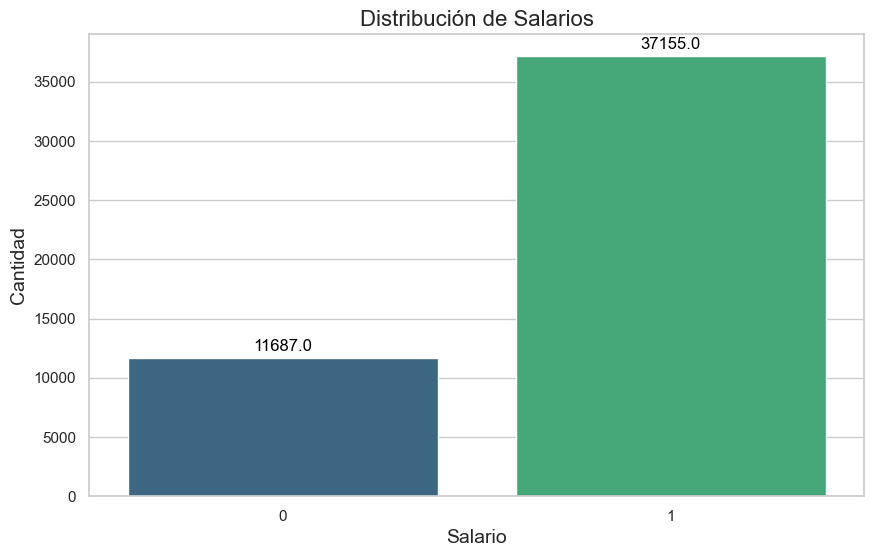

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuración de estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de countplot con opciones personalizadas
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='salario', data=data, palette='viridis')

# Añadir títulos y etiquetas
ax.set_title('Distribución de Salarios', fontsize=16)
ax.set_xlabel('Salario', fontsize=14)
ax.set_ylabel('Cantidad', fontsize=14)

# Añadir etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Mostrar el gráfico
plt.show()
